In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## ABC-анализ

ABC-анализ проводят, чтобы оценить:

* отдельные позиции товаров или всего ассортимента. Так, можно понять, какие товары приносят компании наибольшую прибыль;

* складские запасы. Это покажет, что стоит продать в первую очередь;

* поставщиков — и выяснить, с кем выгоднее сотрудничать;

* базу клиентов — кто из них приносит больше всего прибыли;

* эффективность работы отделов — откуда идёт больше отдачи
<br>

По принципу Парето 20% товаров дают 80% прибыли. ABC-анализ находит эти прибыльные 20%, разделив ассортимент на три группы:

* **A — лидеры**: 20% товаров, которые приносят 80% прибыли;
* **B — середнячки**: 30%, которые приносят 15% прибыли;
* **C — аутсайдеры**: оставшиеся 50%, которые составляют 5% прибыли.

### Загрузка данных

Этот набор данных представляет собой синтетические данные о продажах, созданные только для практических целей. Он не является данными в реальном времени и не основан на реальных бизнес-операциях. Набор данных содержит информацию, которая имитирует транзакции продаж по разным продуктам

In [30]:
data = pd.read_csv('sales_data.csv', sep =',')
data.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


Данные позволяют провести многомерный анализ по выручке, прибыли и количеству проданного товара. Для подсчета прибыли добавим столбец с разницей себестоимости товара и розничной цены.

In [47]:
data['Profit'] = data['Unit_Price'] - data['Unit_Cost']

### Составление ABC групп по выручке

In [128]:
sales_amount_df = data.groupby('Product_ID', as_index = False).Sales_Amount.sum().sort_values('Sales_Amount', ascending=False)
sales_amount_df['percentage'] = sales_amount_df['Sales_Amount'] / sum(sales_amount_df['Sales_Amount'])
sales_amount_df['cumsum'] = sales_amount_df.percentage.cumsum()
sales_amount_df['sales_group'] = np.where(sales_amount_df['cumsum'] <= 0.8, 'A', np.where(sales_amount_df['cumsum'] <= 0.95, 'B','C'))

In [52]:
sales_amount_df.head()

,Product_ID,Sales_Amount,percentage,cumsum,sales_group
98,1099,101773.87,0.020277,0.020277,A
91,1092,90615.62,0.018054,0.038330,A
32,1033,89130.41,0.017758,0.056088,A
89,1090,88043.25,0.017541,0.073629,A
85,1086,82269.71,0.016391,0.090020,A


### Составление ABC групп по прибыли

In [129]:
profit_df = data.groupby('Product_ID', as_index = False).Profit.sum().sort_values('Profit', ascending=False)
profit_df['percentage'] = profit_df['Profit'] / sum(profit_df['Profit'])
profit_df['cumsum'] = profit_df.percentage.cumsum()
profit_df['profit_group'] = np.where(profit_df['cumsum'] <= 0.8, 'A', np.where(profit_df['cumsum'] <= 0.95, 'B','C'))

In [54]:
profit_df.head()

,Product_ID,Profit,percentage,cumsum,profit_group
91,1092,5779.96,0.022833,0.022833,A
89,1090,5693.19,0.022491,0.045324,A
0,1001,4780.26,0.018884,0.064208,A
62,1063,4372.75,0.017274,0.081483,A
85,1086,4367.90,0.017255,0.098738,A


### Составление ABC групп по количеству продаж

In [126]:
quantity_df = data.groupby('Product_ID', as_index = False).Quantity_Sold.sum().sort_values('Quantity_Sold', ascending=False)
quantity_df['percentage'] = quantity_df['Quantity_Sold'] / sum(quantity_df['Quantity_Sold'])
quantity_df['cumsum'] = quantity_df.percentage.cumsum()
quantity_df['quantity_group'] = np.where(quantity_df['cumsum'] <= 0.8, 'A', np.where(quantity_df['cumsum'] <= 0.95, 'B','C'))

In [127]:
quantity_df.head()

,Product_ID,Quantity_Sold,percentage,cumsum,quantity_group
89,1090,590,0.023270,0.023270,A
91,1092,548,0.021613,0.044883,A
61,1062,506,0.019957,0.064839,A
98,1099,502,0.019799,0.084638,A
57,1058,452,0.017827,0.102465,A


### Объединение групп в многомерный ABC

In [130]:
abc_df = pd.merge(sales_amount_df, profit_df, on ='Product_ID')
abc_df = pd.merge(abc_df, quantity_df, on ='Product_ID')
abc_df = abc_df[['Product_ID','sales_group','profit_group','quantity_group']]
abc_df['abc_groups'] = abc_df.sales_group + abc_df.profit_group + abc_df.quantity_group
abc_df.head()

,Product_ID,sales_group,profit_group,quantity_group,abc_groups
0,1099,A,A,A,AAA
1,1092,A,A,A,AAA
2,1033,A,A,A,AAA
3,1090,A,A,A,AAA
4,1086,A,A,A,AAA


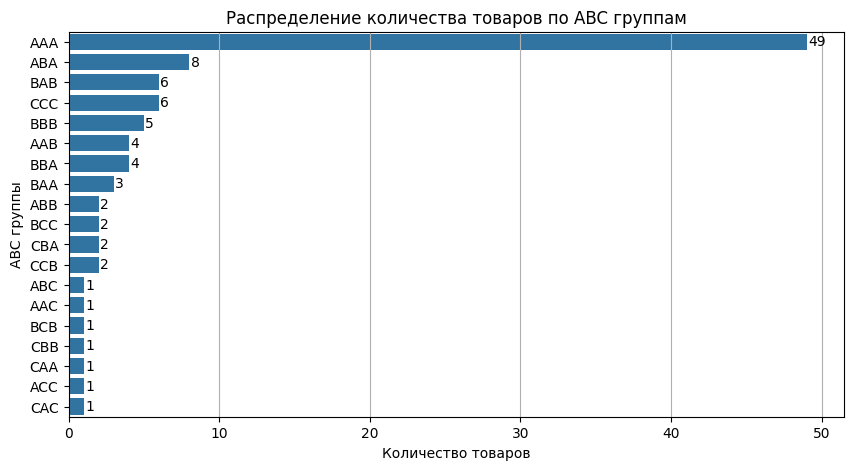

In [131]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(abc_df.abc_groups,order=abc_df.abc_groups.value_counts().index, gap = 0.2, width = 1, ax = ax)
plt.title('Распределение количества товаров по ABC группам')
plt.xlabel('Количество товаров')
plt.ylabel('ABC группы')
plt.grid(axis = 'x')
# Добавление подписей
for bar in ax.patches:
    bar_value = bar.get_y() + bar.get_height() / 2  
    bin_right = bar.get_x() + bar.get_width() 
    ax.text(bin_right + 0.1, bar_value,  # Позиция текста (чуть справа от бина)
            f'{int(bar.get_width())}', ha='left', va='center')

### Выводы

Самая многочисленная группа товаров - AAA, это товары, которые отлично продаются, имеют высокую выручку и маржинальность. Рекомендации по товарам данной группы: если товар имеет стабильный спрос, можно попробовать кратковременно повысить на него цену, и если это не приведет к падению продаж - товар станет еще рентабельнее.

* Группа ABA

**Показатели**: отличное число продаж и маржинальность, однако выручка немного отстаёт

**Рекомендации**: чтобы повысить выручку по данной категории товаров, необходимо либо ещё больше продаж, либо небольшое повышение цены (при этом следить чтобы не упало число продаж). Оптимальным вариантом будет выставить товар на более видное место, чтобы увеличить число продаж.

* Группа BAB

**Показатели**: отличная выручка, однако отстает число продаж и прибыль.

**Рекомендации**: усилить маркетинговые кампании для привлечения дополнительного спроса, однако акции в виде скидок на товар не подойдут, так как прибыль может опуститься до категории С. Также можно рассмотреть оптимизацию издержек по товару (например, за счёт переговоров с поставщиками).

* Группа CCC

**Показатели**: мало продаются, имеют низкую выручку и прибыль

**Рекомендации**: претенденты на вывод из ассортимента, каждый товар из этой группы следует рассмотреть отдельно уже на уровне ответственных за ассортиментную матрицу, и если не будет вариантов как его "поднять" - вывести из ассортимента.

* Группа BBB

**Показатели**: средние показатели по всем параметрам (кол-во продаж, выручка, прибыль)

**Рекомендации**: данные товары имеют потенциал для улучшения до уровня ААА, для данной категории есть много вариантов по улучшению

- переставить товар на более видное место, либо использовать кросс-продажи (предложение клиенту дополнительных товаров, которые логически дополняют его покупку) для увеличения продаж
- оптимизировать издержки (найти нового поставщика, либо договориться с текущим) для понижения себестоимости
- привить любовь к нишевым товарам, возможно покупатели не знакомы с некоторыми брендами, сделать упор на их рекламу

* Группы AAB и ABB

**Показатели**: отличная продаваемость при средней маржинальности.

**Рекомендации**: нужно найти более выгодную цену поставки чтобы стать AAA, либо немного подтянуть цену, если товар имеет стабильно высокий спрос.

* Группы BBA и BAA

**Показатели**: отличная маржинальность, однако можно улучшить продаваемость товара

**Рекомендации**: увеличить число продаж с помощью маркетинговых активностей, например 2+1, либо скидка при покупке от определенного количества товара.

* Группа BCC

**Показатели**: средние продажи, но плохая выручка и маржинальность

**Рекомендации**: в данной категории не получится поднять маржинальность за счет скидок на товар, так как могут упасть продажи, опять же стоит пересмотреть себестоимость

* Группа CBA

**Показатели**: отличная маржинальность при малом числе продаж

**Рекомендации**: возможно это нишевые товары, для которых особо поднять продажи не получится, но они все равно генерируют прибыль за счет своей высокой маржинальности, можно попробовать увеличить узнаваемость данных товаров среди большего числа покупателей - временно сделать скидку, тогда возможно товар найдет новых фанатов.

* Группа CCB

**Показатели**: плохая продаваемость и выручка, средний показатель маржинальности

**Рекомендации**: есть потенциал за счет показателя маржинальности, если вырастить количество продаж без потери в прибыли, то поднимется и выручка.

* Остальные группы (например, ABC, AAC, BCB, CBB, CAA, ACC, CAC по 1 товару)

**Показатели**: каждая из этих групп имеет свою комбинацию показателей, где один или несколько аспектов требуют улучшения.

**Рекомендации**: одноразовые продукты требуют индивидуального анализа, так как небольшой объём может указывать как на нишевый характер, так и на экспериментальную категорию.